# Net Bookings by Marketing Channel (xRLT) and Region (FBU)

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

pd.options.display.max_columns = 150

In [2]:
all_rlt = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/AllMetrics_Jan31/channelForecasts/alldata_regions_channels.csv')
all_rlt["y"] = pd.to_numeric(all_rlt["y"], downcast='float')
all_rlt.head()

,ds,Region,rlt,y,year,mon,dow
0,2017-01-01,CE,Direct,115.0,2017,Jan,Sunday
1,2017-01-01,CE,Display,21.0,2017,Jan,Sunday
2,2017-01-01,CE,Email,101.0,2017,Jan,Sunday
3,2017-01-01,CE,Other,160.0,2017,Jan,Sunday
4,2017-01-01,CE,Partner,84.0,2017,Jan,Sunday


In [46]:
all_rlt.tail()

,ds,Region,rlt,y,year,mon,dow,rlt_cat
26630,2019-01-31,UK,Email,76.0,2019,Jan,Thursday,2
26631,2019-01-31,UK,Other,179.0,2019,Jan,Thursday,3
26632,2019-01-31,UK,Partner,172.0,2019,Jan,Thursday,4
26633,2019-01-31,UK,SEM,384.0,2019,Jan,Thursday,5
26634,2019-01-31,UK,SEO,245.0,2019,Jan,Thursday,6


In [3]:
all_rlt["rlt"] = all_rlt["rlt"].astype('category')
all_rlt.dtypes

all_rlt["rlt_cat"] = all_rlt["rlt"].cat.codes
all_rlt.head()

,ds,Region,rlt,y,year,mon,dow,rlt_cat
0,2017-01-01,CE,Direct,115.0,2017,Jan,Sunday,0
1,2017-01-01,CE,Display,21.0,2017,Jan,Sunday,1
2,2017-01-01,CE,Email,101.0,2017,Jan,Sunday,2
3,2017-01-01,CE,Other,160.0,2017,Jan,Sunday,3
4,2017-01-01,CE,Partner,84.0,2017,Jan,Sunday,4


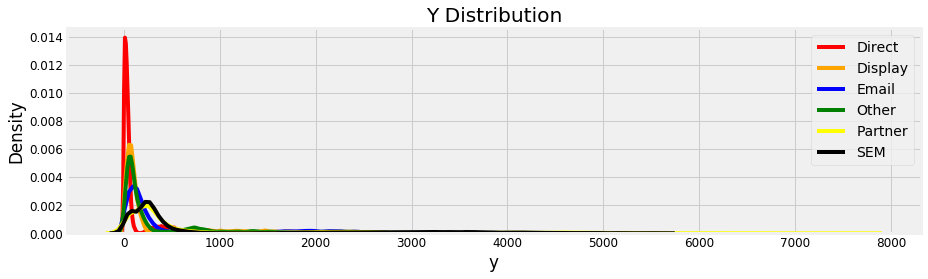

In [4]:
from collections import OrderedDict

plt.figure(figsize = (30, 7))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green',
                     5: 'yellow', 6: 'black', 7: 'grey'})
rlt_mapping = OrderedDict({1: 'Direct', 2: 'Display', 3: 'Email', 4: 'Other',
                              5: 'Partner', 6: 'SEM', 7: 'SEO'})

# Iterate through the float columns
# for i, col in enumerate(all_rlt.select_dtypes('float')):
# for i, col in enumerate(all_rlt['y']):
# for i, col in enumerate(all_rlt.select_dtypes('int')):
for i, col in enumerate(all_rlt.select_dtypes('float32')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the RLT marketing channels
    for marketing_channel, color in colors.items():
        # Plot each marketing channel as a separate line
        sns.kdeplot(all_rlt.loc[all_rlt['rlt_cat'] == marketing_channel, col].dropna(), 
                    ax = ax, color = color, label = rlt_mapping[marketing_channel])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

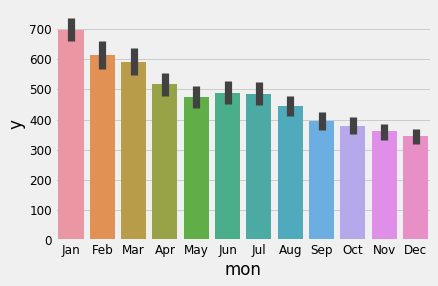

In [5]:
ax = sns.barplot(x="mon", y="y", data=all_rlt)

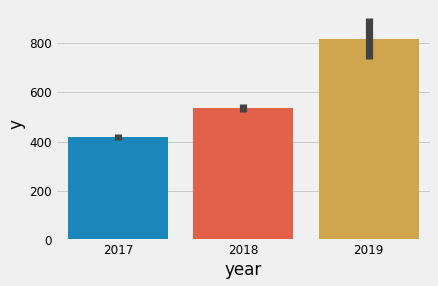

In [6]:
ax = sns.barplot(x="year", y="y", data=all_rlt)

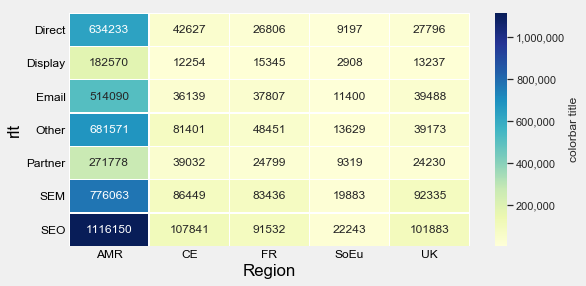

In [7]:
all_rlt17 = all_rlt.loc[all_rlt['year'] == 2017]
all_rlt_pivot = all_rlt17.pivot_table(index='rlt', columns='Region', values='y', aggfunc = np.sum)

f, ax = plt.subplots(figsize=(8, 4))
sns.set(font_scale=1.0)

from matplotlib.ticker import FuncFormatter
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

sns_plot = sns.heatmap(all_rlt_pivot, annot=True, fmt = '.0f', linewidths=.5, ax=ax, cmap="YlGnBu",  
           cbar_kws={'label': 'colorbar title','format':comma_fmt})
fig = sns_plot.get_figure()
fig.savefig("rlt_region_nb_2017.png")

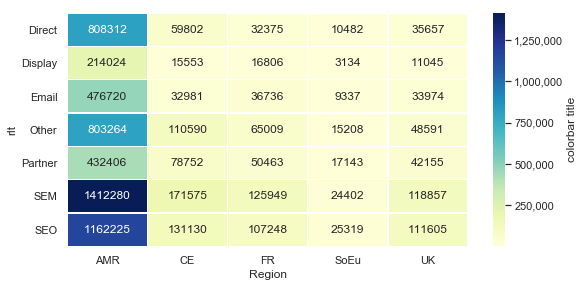

In [8]:
all_rlt18 = all_rlt.loc[all_rlt['year'] == 2018]
all_rlt_pivot = all_rlt18.pivot_table(index='rlt', columns='Region', values='y', aggfunc = np.sum)

f, ax = plt.subplots(figsize=(8, 4))
sns.set(font_scale=1.0)
from matplotlib.ticker import FuncFormatter

comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))
sns_plot = sns.heatmap(all_rlt_pivot, annot=True, fmt = '.0f', linewidths=.5, ax=ax, cmap="YlGnBu",  
           cbar_kws={'label': 'colorbar title','format':comma_fmt})
fig = sns_plot.get_figure()
fig.savefig("rlt_region_nb_2018.png")

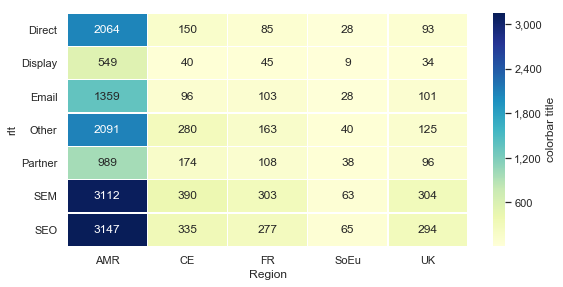

In [9]:
all_rlt_pivot = all_rlt.pivot_table(index='rlt', columns='Region', values='y', aggfunc = np.mean)

f, ax = plt.subplots(figsize=(8, 4))
sns.set(font_scale=1.0)
from matplotlib.ticker import FuncFormatter

comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))
sns_plot = sns.heatmap(all_rlt_pivot, annot=True, fmt = '.0f', linewidths=.5, ax=ax, cmap="YlGnBu",  
           cbar_kws={'label': 'colorbar title','format':comma_fmt})
fig = sns_plot.get_figure()
fig.savefig("rlt_region_nb.png")

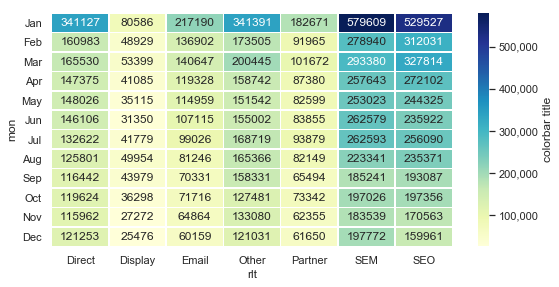

In [10]:
all_rlt_pivot = all_rlt.pivot_table(index='mon', columns='rlt', values='y', aggfunc = np.sum)
all_rlt_pivot.index = pd.CategoricalIndex(all_rlt_pivot.index, 
                                   categories= ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
all_rlt_pivot.sort_index(level=0, inplace=True)
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(all_rlt_pivot, annot=True, fmt = '.0f', linewidths=.5, ax=ax, cmap="YlGnBu", 
           cbar_kws={'label': 'colorbar title','format':comma_fmt})

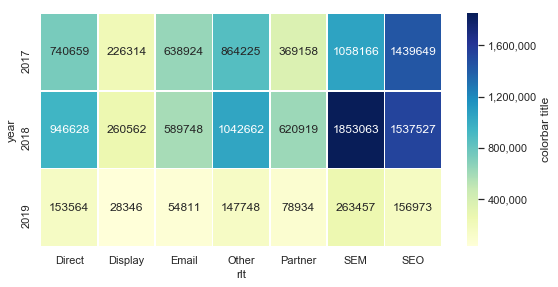

In [11]:
all_rlt_pivot = all_rlt.pivot_table(index='year', columns='rlt', values='y', aggfunc = np.sum)
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(all_rlt_pivot, annot=True, fmt = '.0f', linewidths=.5, ax=ax, cmap="YlGnBu", 
           cbar_kws={'label': 'colorbar title','format':comma_fmt})

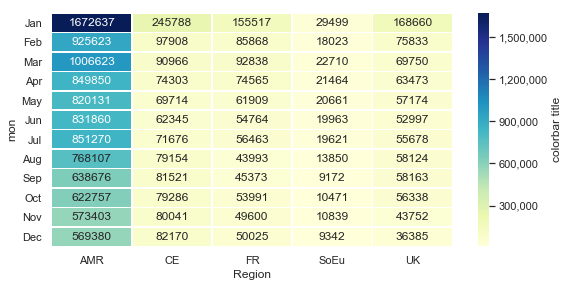

In [12]:
all_rlt_pivot = all_rlt.pivot_table(index='mon', columns='Region', values='y', aggfunc = np.sum)
all_rlt_pivot.index = pd.CategoricalIndex(all_rlt_pivot.index, 
                                   categories= ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
all_rlt_pivot.sort_index(level=0, inplace=True)
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(all_rlt_pivot, annot=True, fmt = '.0f', linewidths=.5, ax=ax, cmap="YlGnBu", 
           cbar_kws={'label': 'colorbar title','format':comma_fmt})

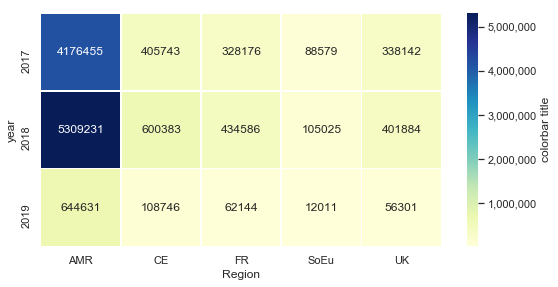

In [13]:
all_rlt_pivot = all_rlt.pivot_table(index='year', columns='Region', values='y', aggfunc = np.sum)
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(all_rlt_pivot, annot=True, fmt = '.0f', linewidths=.5, ax=ax, cmap="YlGnBu", 
           cbar_kws={'label': 'colorbar title','format':comma_fmt})

In [15]:
df = pd.read_csv("/Users/akuppam/Documents/Hprog/Py/Summary/xAll_channels_forecasts_plots.csv")
df.columns = ['Date', 'Direct', 'Display', 'Email', 'Other', 'Partner', 'SEM', 'SEO']
df = df.set_index('Date')
df.head()

,Direct,Display,Email,Other,Partner,SEM,SEO
Date,,,,,,,
2017-01-01,1974.0,177.0,1570.0,1386.0,630.0,1933.0,3473.0
2017-01-02,2810.0,341.0,2464.0,2096.0,851.0,2781.0,4877.0
2017-01-03,2925.0,451.0,2838.0,2285.0,965.0,2898.0,4941.0
2017-01-04,3035.0,543.0,2959.0,3497.0,998.0,3090.0,5415.0
2017-01-05,3200.0,576.0,2824.0,2258.0,991.0,2986.0,5234.0


In [17]:
df['net_bookings'] = df.Direct + df.Display + df.Email + df.Other + df.Partner + df.SEM + df.SEO
df.head()

,Direct,Display,Email,Other,Partner,SEM,SEO,net_bookings
Date,,,,,,,,
2017-01-01,1974.0,177.0,1570.0,1386.0,630.0,1933.0,3473.0,11143.0
2017-01-02,2810.0,341.0,2464.0,2096.0,851.0,2781.0,4877.0,16220.0
2017-01-03,2925.0,451.0,2838.0,2285.0,965.0,2898.0,4941.0,17303.0
2017-01-04,3035.0,543.0,2959.0,3497.0,998.0,3090.0,5415.0,19537.0
2017-01-05,3200.0,576.0,2824.0,2258.0,991.0,2986.0,5234.0,18069.0


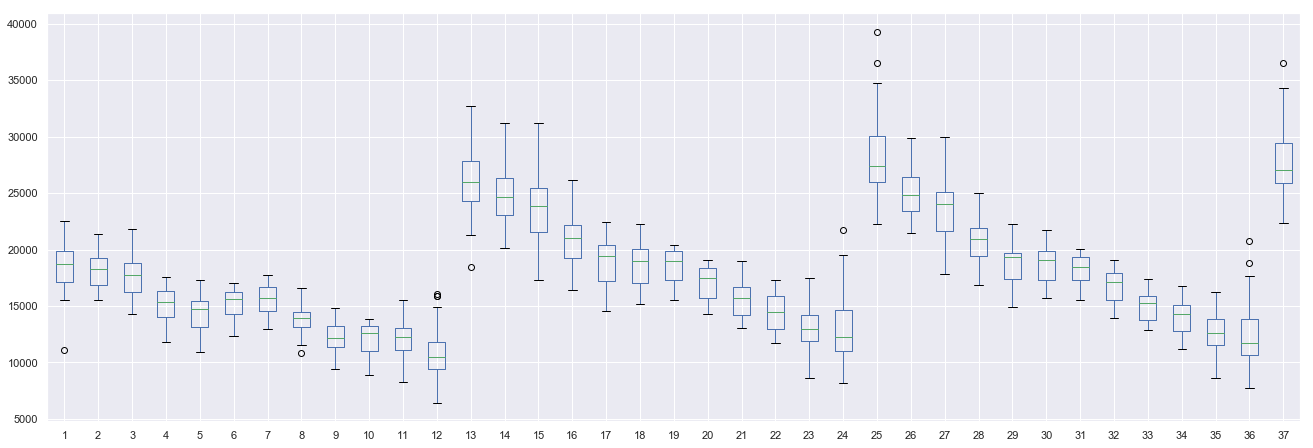

In [25]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
from pandas import concat
from pylab import rcParams
rcParams['figure.figsize'] = 20, 7

series = Series.from_csv("/Users/akuppam/Documents/Hprog/Py/Summary/net_bookings_channels_forecasts.csv", header=0)
#series = Series.from_array(df['net_bookings'])
groups = series.groupby(TimeGrouper('M'))
#years = DataFrame()
months = DataFrame()
#for name, group in groups:
#	months[name.month] = group.values
#months.plot(subplots=True, legend=False)
#pyplot.show()

months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,38)
months.boxplot()

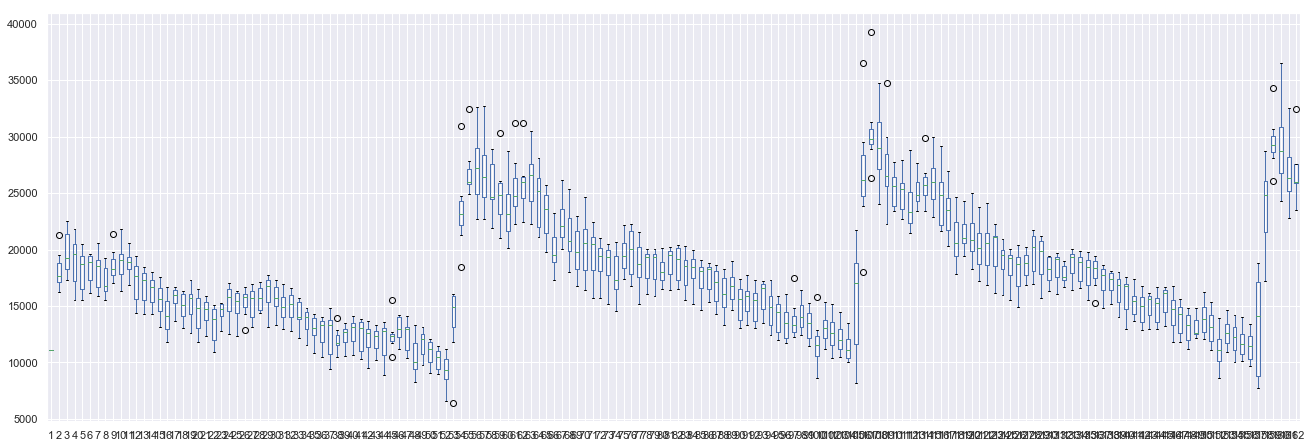

In [27]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
from pylab import rcParams

rcParams['figure.figsize'] = 20, 7

series = Series.from_csv("/Users/akuppam/Documents/Hprog/Py/Summary/net_bookings_channels_forecasts.csv", header=0)
groups = series.groupby(TimeGrouper('W'))
#years = DataFrame()
months = DataFrame()
#for name, group in groups:
#	months[name.month] = group.values
#months.plot(subplots=True, legend=False)
#pyplot.show()

months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,163)
months.boxplot()

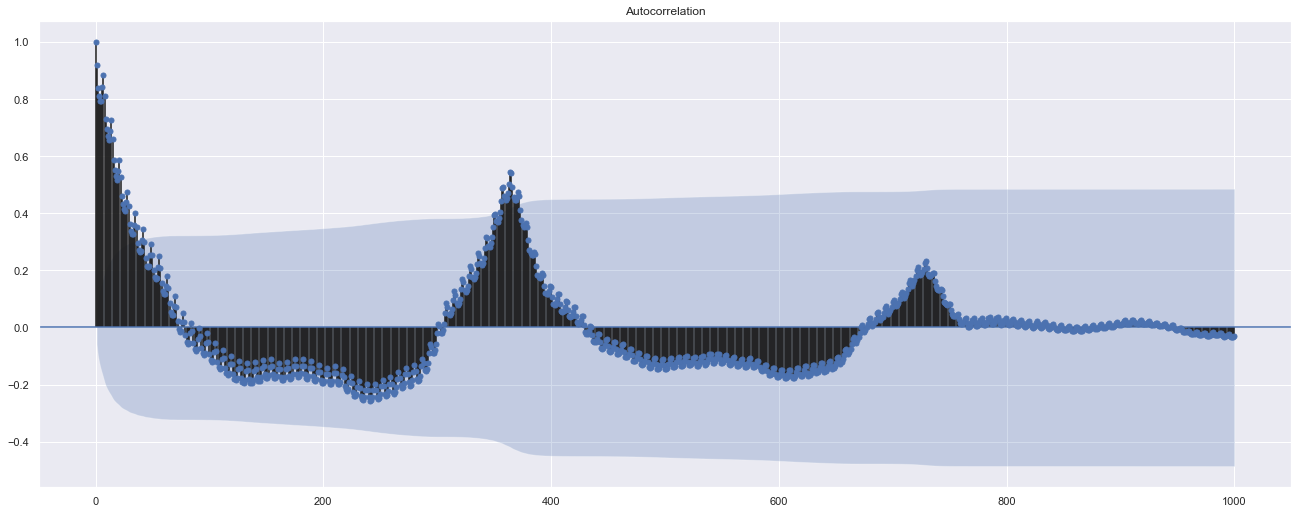

In [32]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = Series.from_csv("/Users/akuppam/Documents/Hprog/Py/Summary/net_bookings_channels_forecasts.csv", header=0)
plot_acf(series, lags=1000)
pyplot.show()

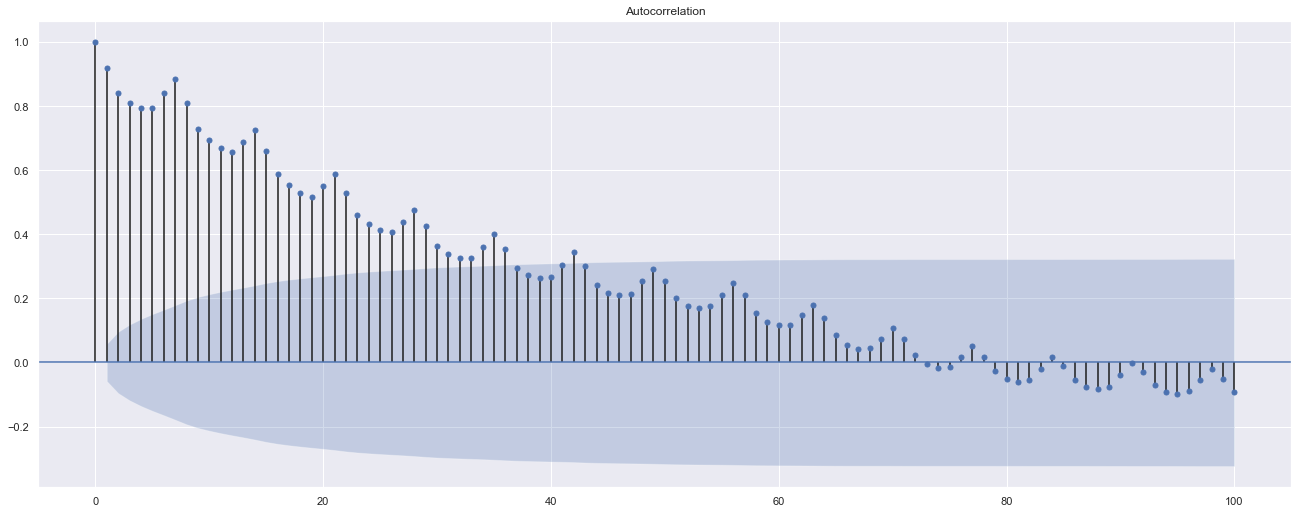

In [35]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = Series.from_csv("/Users/akuppam/Documents/Hprog/Py/Summary/net_bookings_channels_forecasts.csv", header=0)
plot_acf(series, lags=100)
pyplot.show()

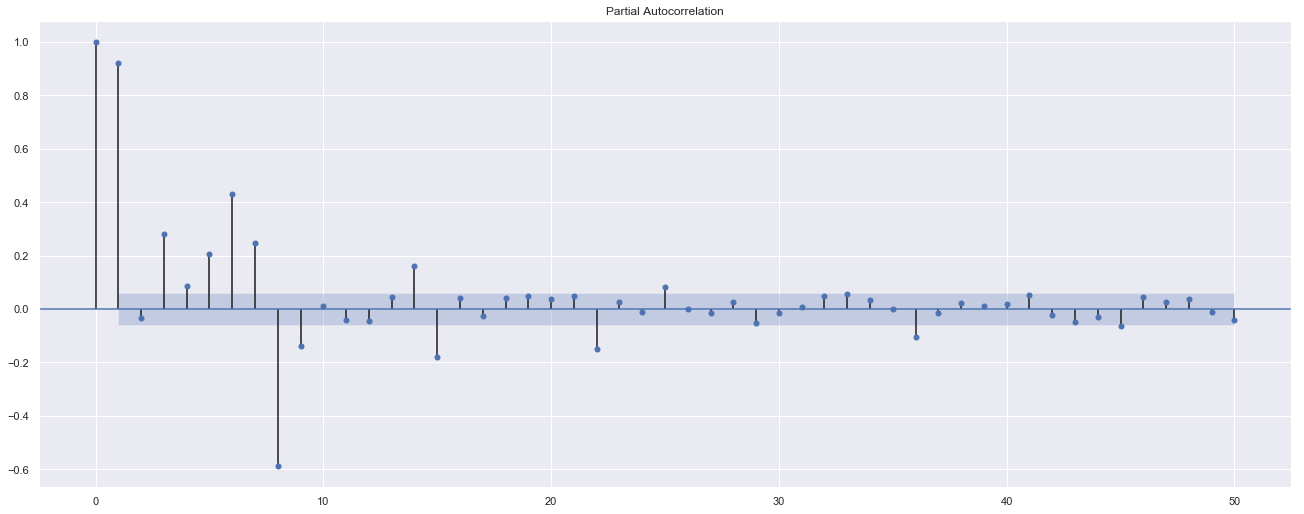

In [34]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series = Series.from_csv("/Users/akuppam/Documents/Hprog/Py/Summary/net_bookings_channels_forecasts.csv", header=0)
plot_pacf(series, lags=50)
pyplot.show()

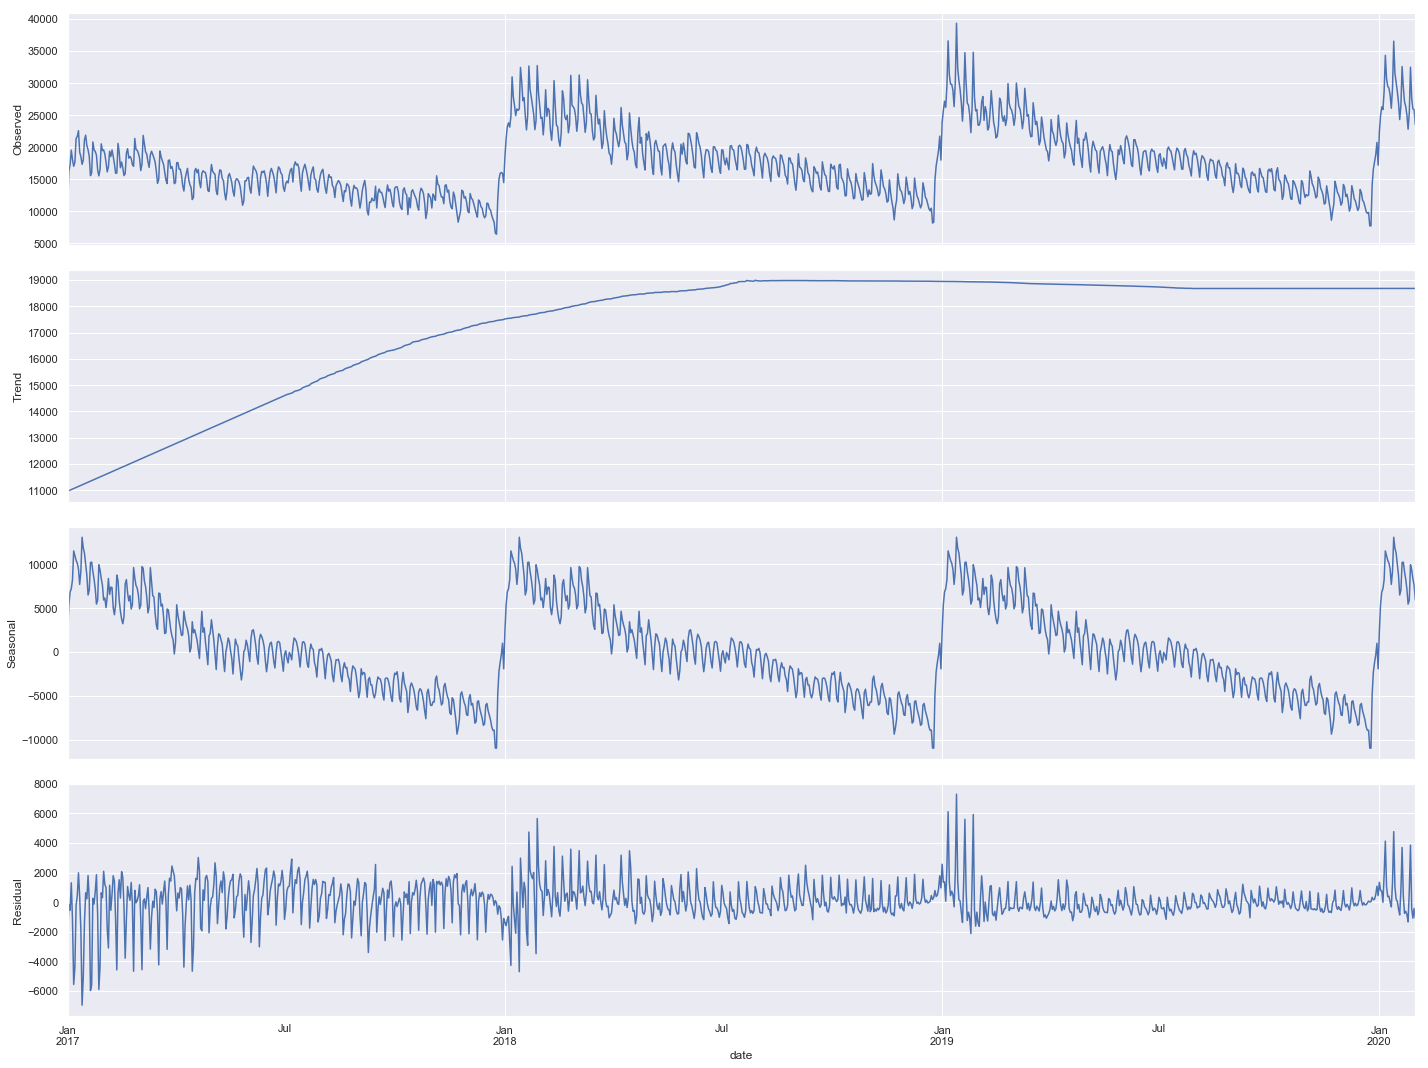

In [44]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15
sm.tsa.seasonal_decompose(series, freq = 365, extrapolate_trend=True).plot()
plt.show()

In [36]:
df = pd.read_csv("/Users/akuppam/Documents/Hprog/Py/Summary/xAll_channels_forecasts_plots.csv")
df.columns = ['Date', 'Direct', 'Display', 'Email', 'Other', 'Partner', 'SEM', 'SEO']
df = df.set_index('Date')
df.head()

,Direct,Display,Email,Other,Partner,SEM,SEO
Date,,,,,,,
2017-01-01,1974.0,177.0,1570.0,1386.0,630.0,1933.0,3473.0
2017-01-02,2810.0,341.0,2464.0,2096.0,851.0,2781.0,4877.0
2017-01-03,2925.0,451.0,2838.0,2285.0,965.0,2898.0,4941.0
2017-01-04,3035.0,543.0,2959.0,3497.0,998.0,3090.0,5415.0
2017-01-05,3200.0,576.0,2824.0,2258.0,991.0,2986.0,5234.0


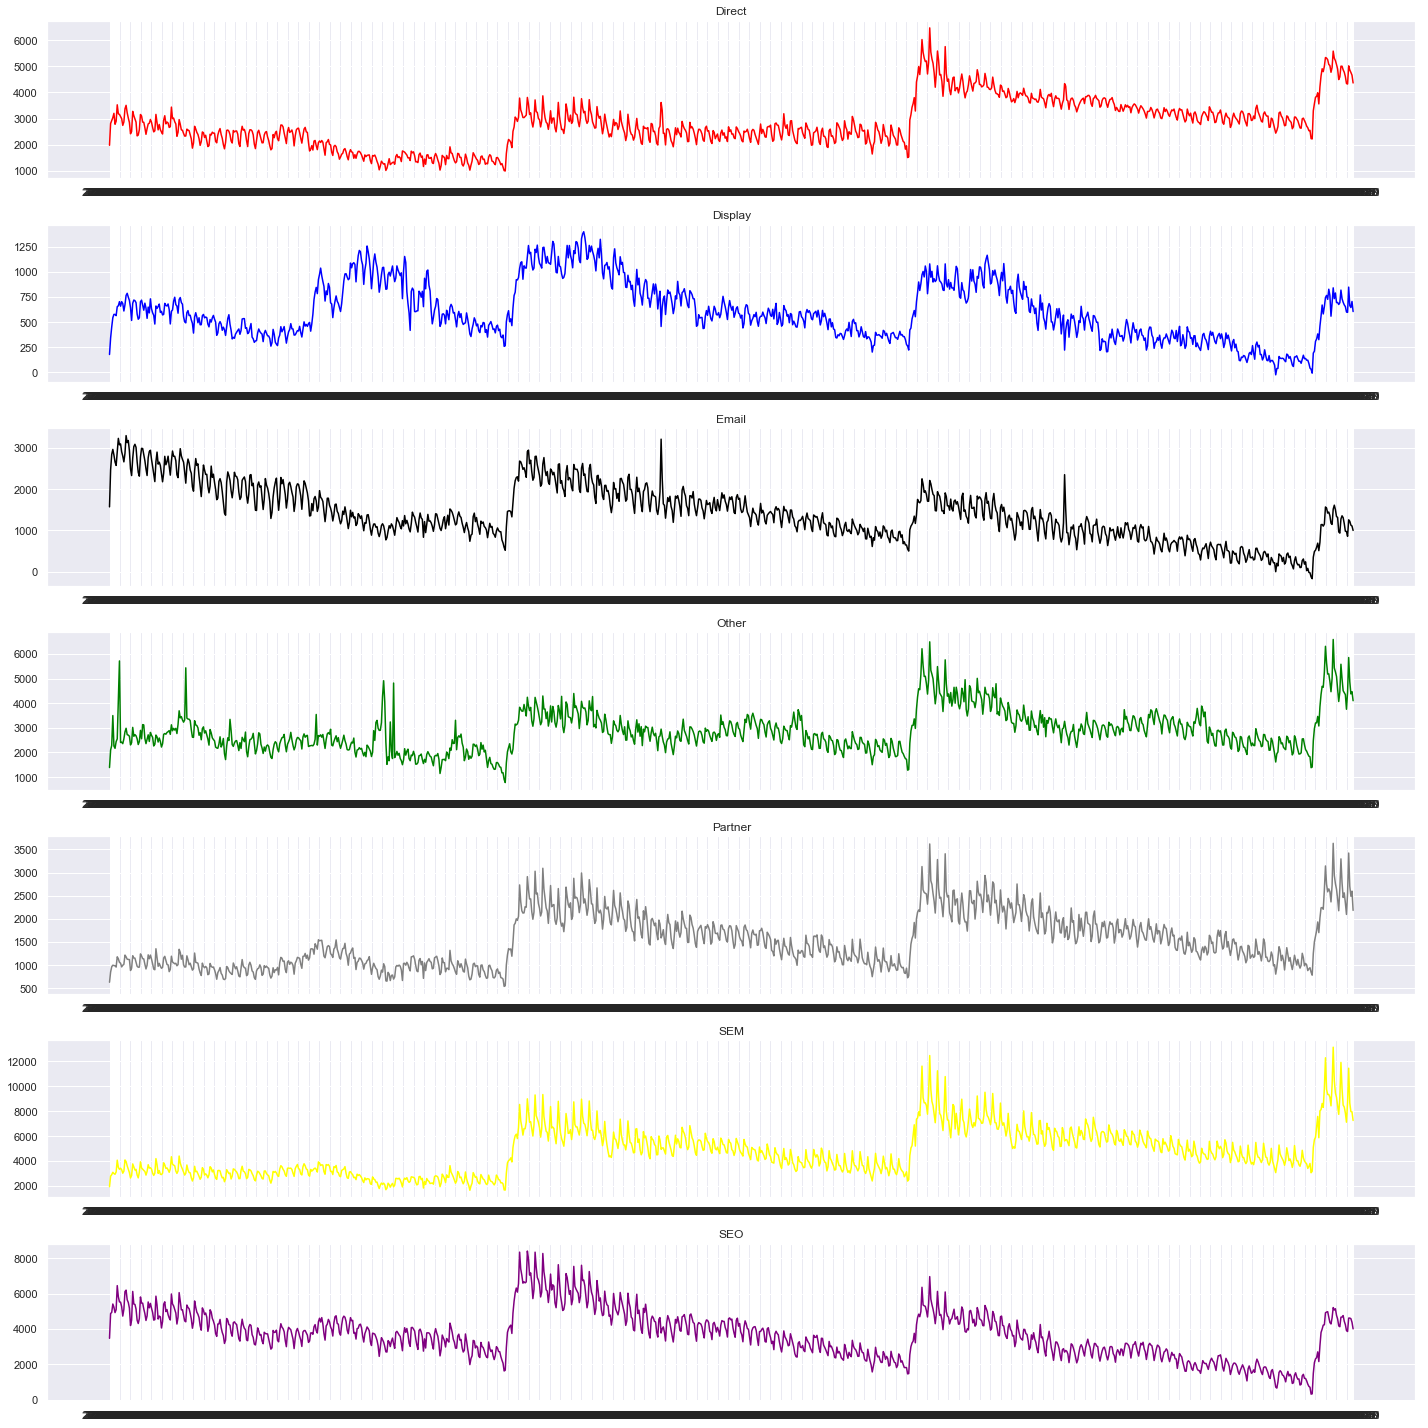

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
# (rows, cols, plot#)
plt.subplot(7, 1, 1)
plt.plot(df.Direct, color = 'red')
plt.title('Direct')
plt.subplot(7, 1, 2)
plt.plot(df.Display, color = 'blue')
plt.title('Display')
plt.subplot(7, 1, 3)
plt.plot(df.Email, color = 'black')
plt.title('Email')
plt.subplot(7, 1, 4)
plt.plot(df.Other, color = 'green')
plt.title('Other')
plt.subplot(7, 1, 5)
plt.plot(df.Partner, color = 'grey')
plt.title('Partner')
plt.subplot(7, 1, 6)
plt.plot(df.SEM, color = 'yellow')
plt.title('SEM')
plt.subplot(7, 1, 7)
plt.plot(df.SEO, color = 'purple')
plt.title('SEO')
plt.tight_layout()

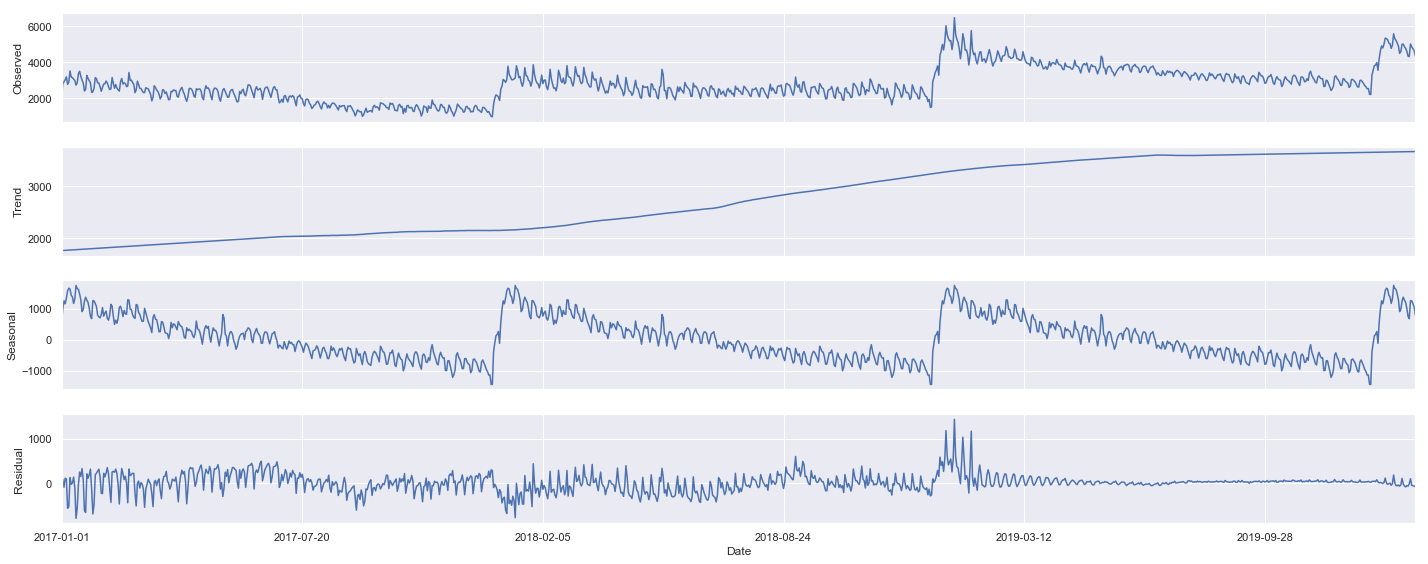

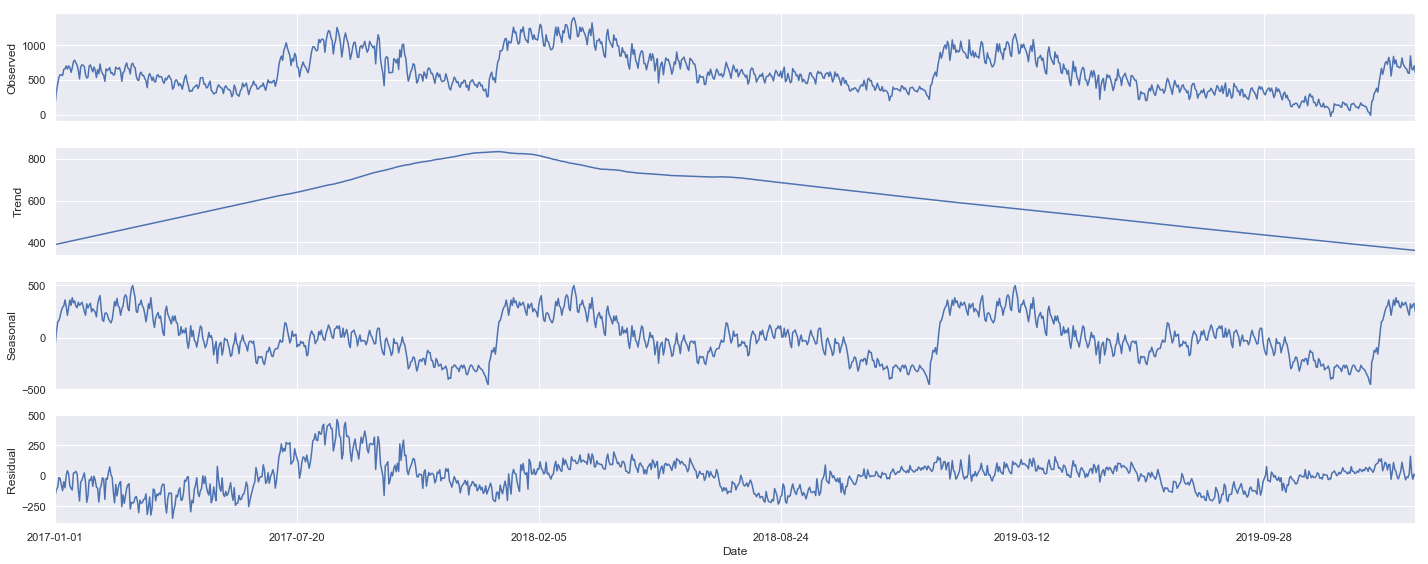

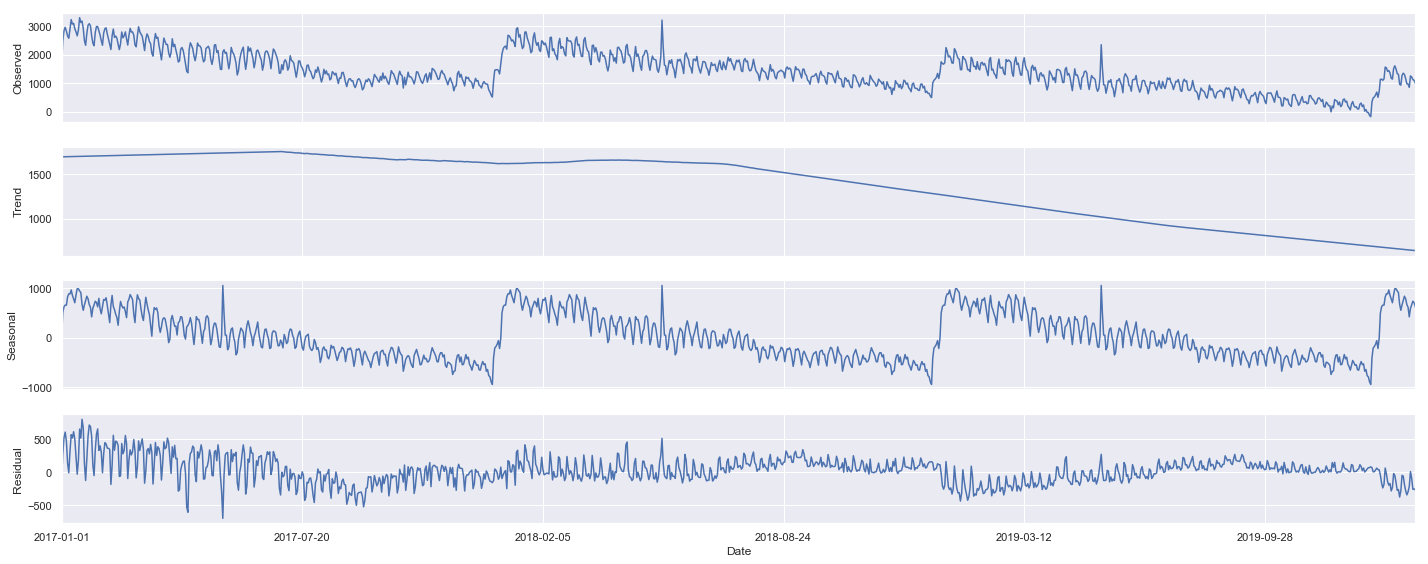

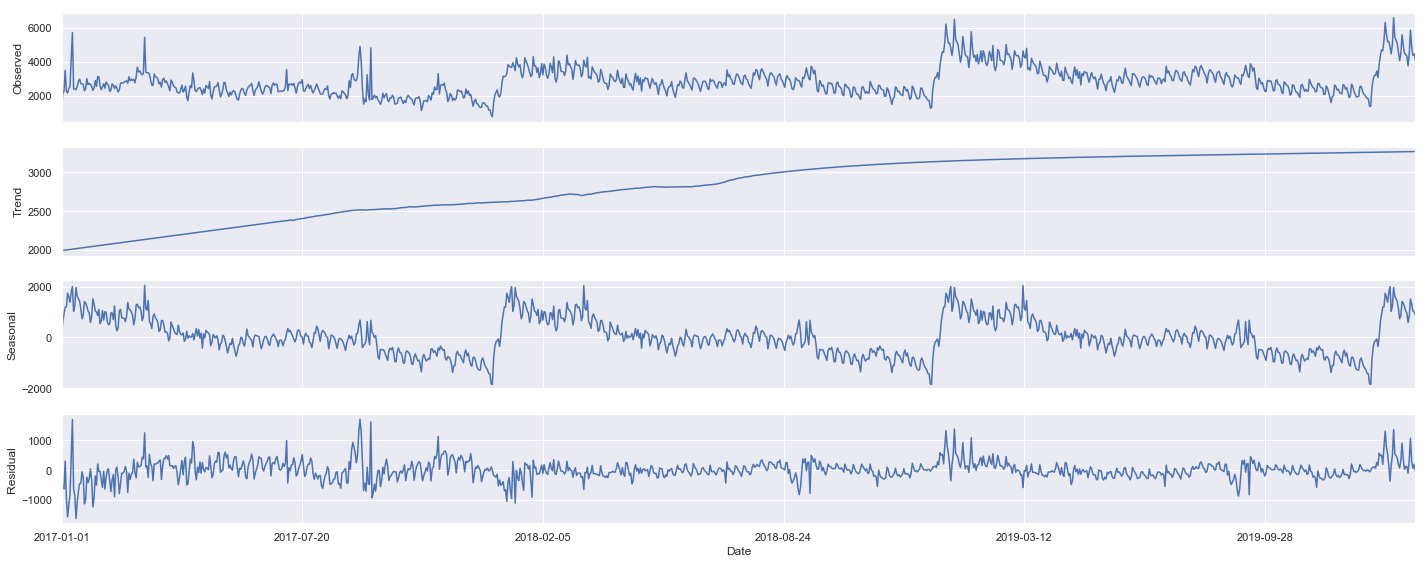

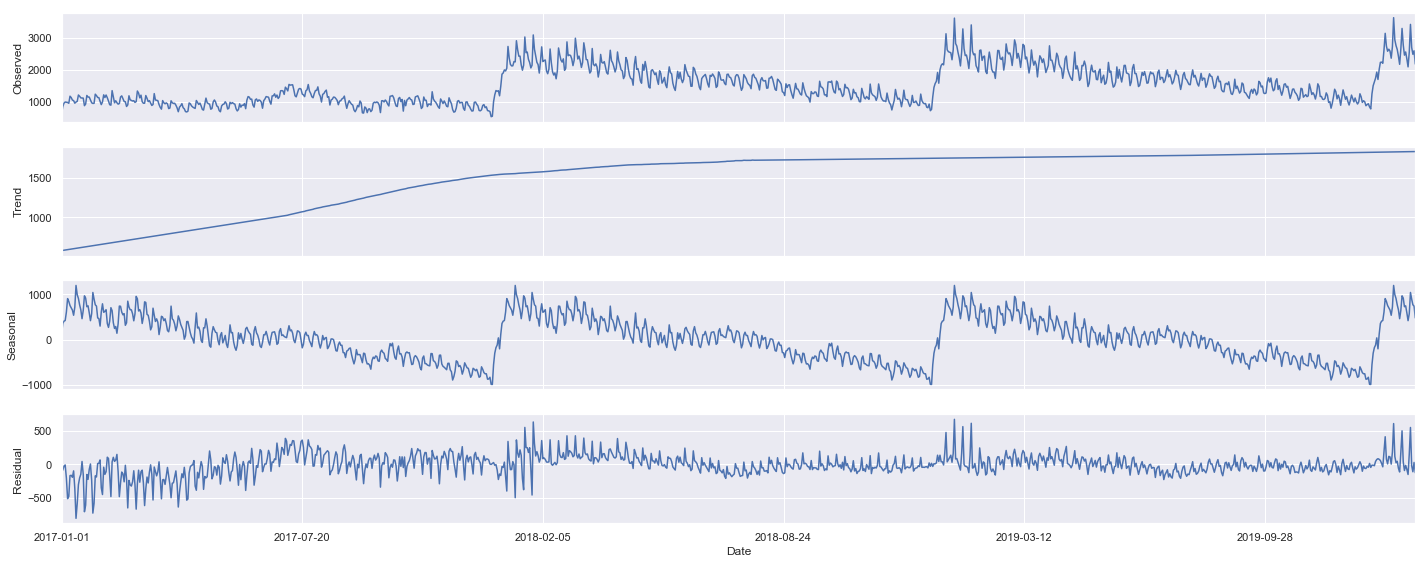

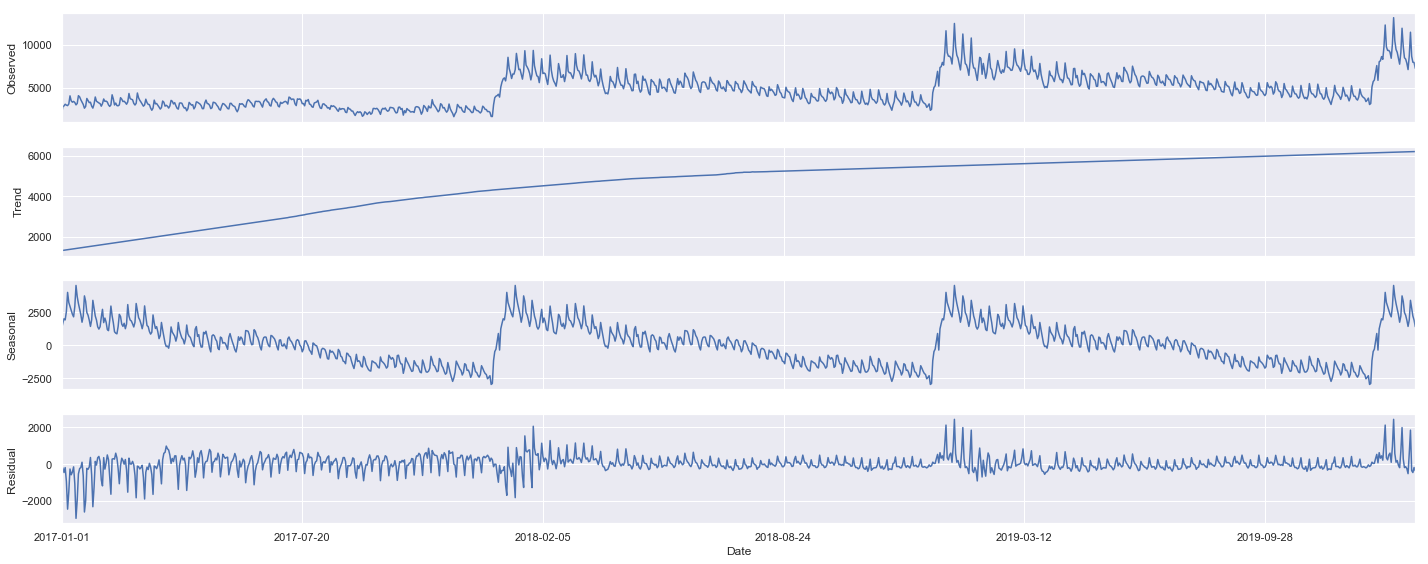

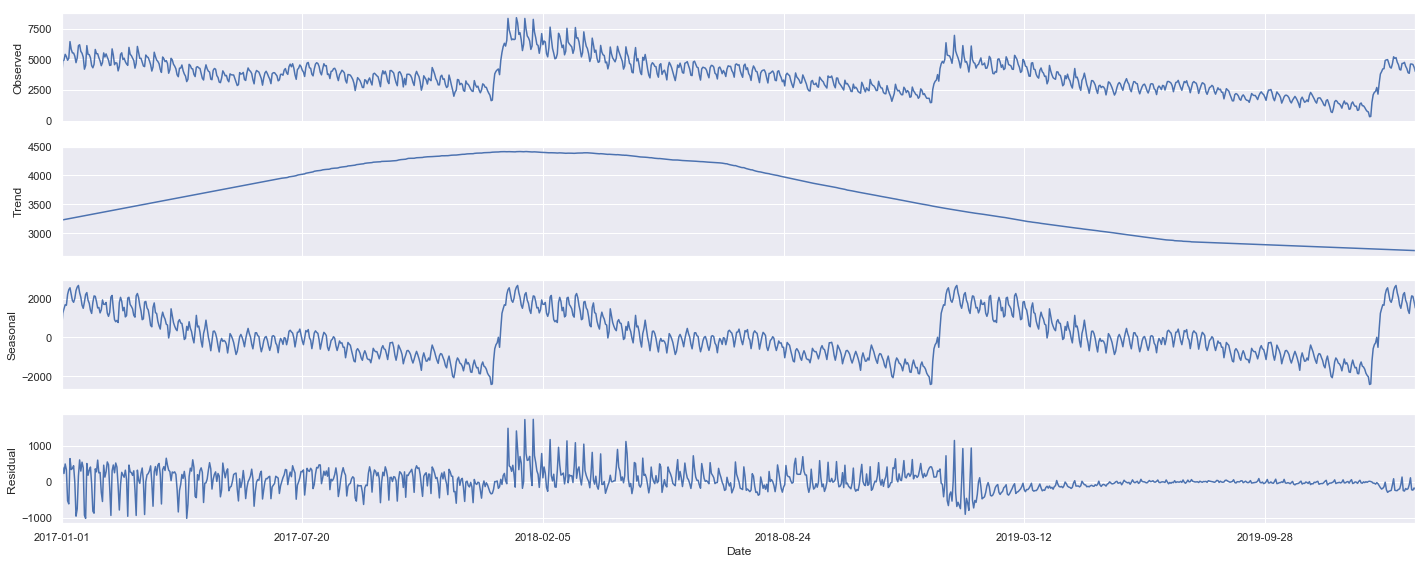

In [38]:
sm.tsa.seasonal_decompose(df['Direct'], freq = 365, extrapolate_trend=True).plot()
sm.tsa.seasonal_decompose(df['Display'], freq = 365, extrapolate_trend=True).plot()
sm.tsa.seasonal_decompose(df['Email'], freq = 365, extrapolate_trend=True).plot()
sm.tsa.seasonal_decompose(df['Other'], freq = 365, extrapolate_trend=True).plot()
sm.tsa.seasonal_decompose(df['Partner'], freq = 365, extrapolate_trend=True).plot()
sm.tsa.seasonal_decompose(df['SEM'], freq = 365, extrapolate_trend=True).plot()
sm.tsa.seasonal_decompose(df['SEO'], freq = 365, extrapolate_trend=True).plot()
plt.show()